# Exploratory Data Analysis

**Project:** Airbnb Pricing Analysis

**Team:** Jessie Dicker, Norma Arredondo

**Date:** February 9, 2026




## Table of Contents
1. Setup & Load Data
2. Data Quality Check
3. Target Variable Analysis
4. Feature Distributions
5. Correlation Analysis
6. Key Findings Summary



## 1. Setup & Load Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)

print("✓ Libraries loaded!")

✓ Libraries loaded!


In [2]:
# Load your data
# TODO: Update the file path to your dataset
df = pd.read_csv('../data/raw/AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2



## 2. Data Quality Check

**Questions to answer:**
- What are the data types?
- Are there missing values?
- Are there duplicate rows?

In [3]:
# Data Types:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [4]:
# Data Frame information:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# Missing Values:
print(f'Missing values: {df.isnull().sum().sum()}')


Missing values: 20141


In [6]:
# Duplicates:
print(f'Duplicate rows: {df.duplicated().sum()}')


Duplicate rows: 0


### Data Quality Observations

*TODO: Write your observations here*

1. **Data types:** float, object, integer
2. **Missing values:** There are 20,141 missing values
3. **Duplicates:** There are no duplicates 
4. **Potential issues:** Missing significant amount of data. 



## 3. Target Variable Analysis

**Your target variable:** price (the price per night for Airbnbs in NYC)

In [7]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

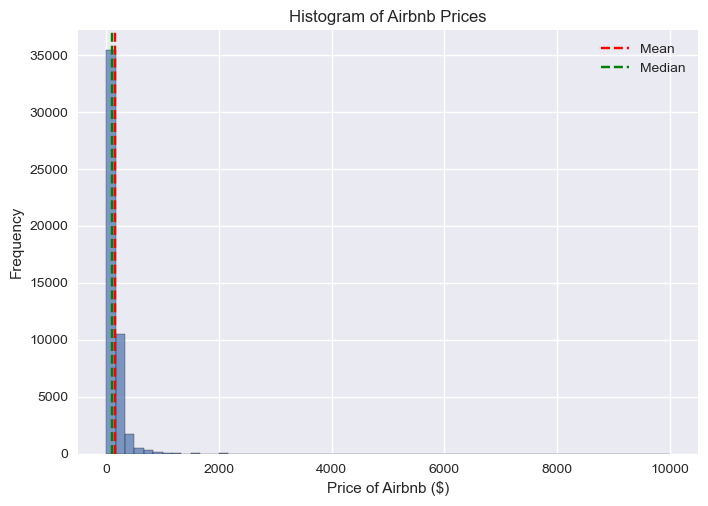

In [8]:
# Distribution of price variable:
plt.plot(figsize=(10,8))
plt.hist(df['price'], bins=60, edgecolor='black',alpha=0.7)
plt.axvline(df['price'].mean(),color='red',linestyle='--',label='Mean')
plt.axvline(df['price'].median(),color='green',linestyle='--',label='Median')
plt.xlabel('Price of Airbnb ($)')
plt.ylabel('Frequency')
plt.title('Histogram of Airbnb Prices')
plt.legend()
plt.show()

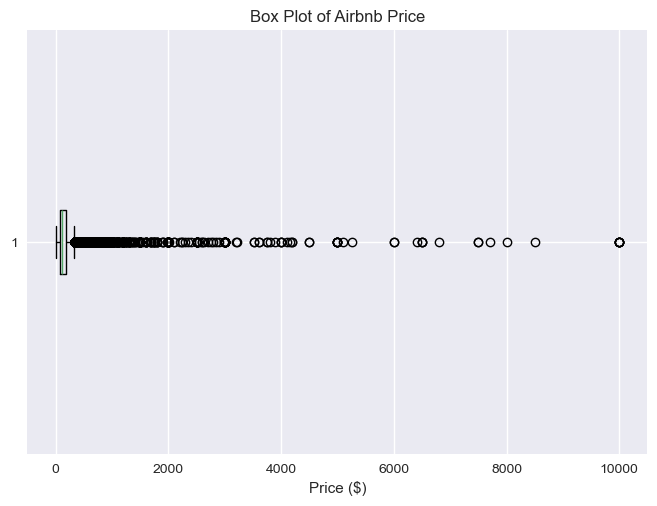

In [9]:
# Distribution of price (boxplot):
plt.plot(figsize=(6,4))
plt.boxplot(df['price'], vert=False)
plt.xlabel('Price ($)')
plt.title('Box Plot of Airbnb Price')
plt.show()

In [ ]:
# Outliers:


### Target Variable Observations


1. **Distribution shape:** The distribution is skewed heavily right
2. **Outliers:** There are many outliers, with the largest at price = $10,000
3. **Potential issues:** The large amount of outliers are skewing the data distribution, which is not ideal for regression analysis. 



## 4. Feature Distributions

In [15]:
numeric_features = df[['host_id','latitude','longitude','price','minimum_nights','number_of_reviews',
                        'reviews_per_month','calculated_host_listings_count','availability_365']]
numeric_features

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,4632,40.80902,-73.94190,150,3,0,NaN,1,365
3,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,7192,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...
48890,8232441,40.67853,-73.94995,70,2,0,NaN,2,9
48891,6570630,40.70184,-73.93317,40,4,0,NaN,2,36
48892,23492952,40.81475,-73.94867,115,10,0,NaN,1,27
48893,30985759,40.75751,-73.99112,55,1,0,NaN,6,2


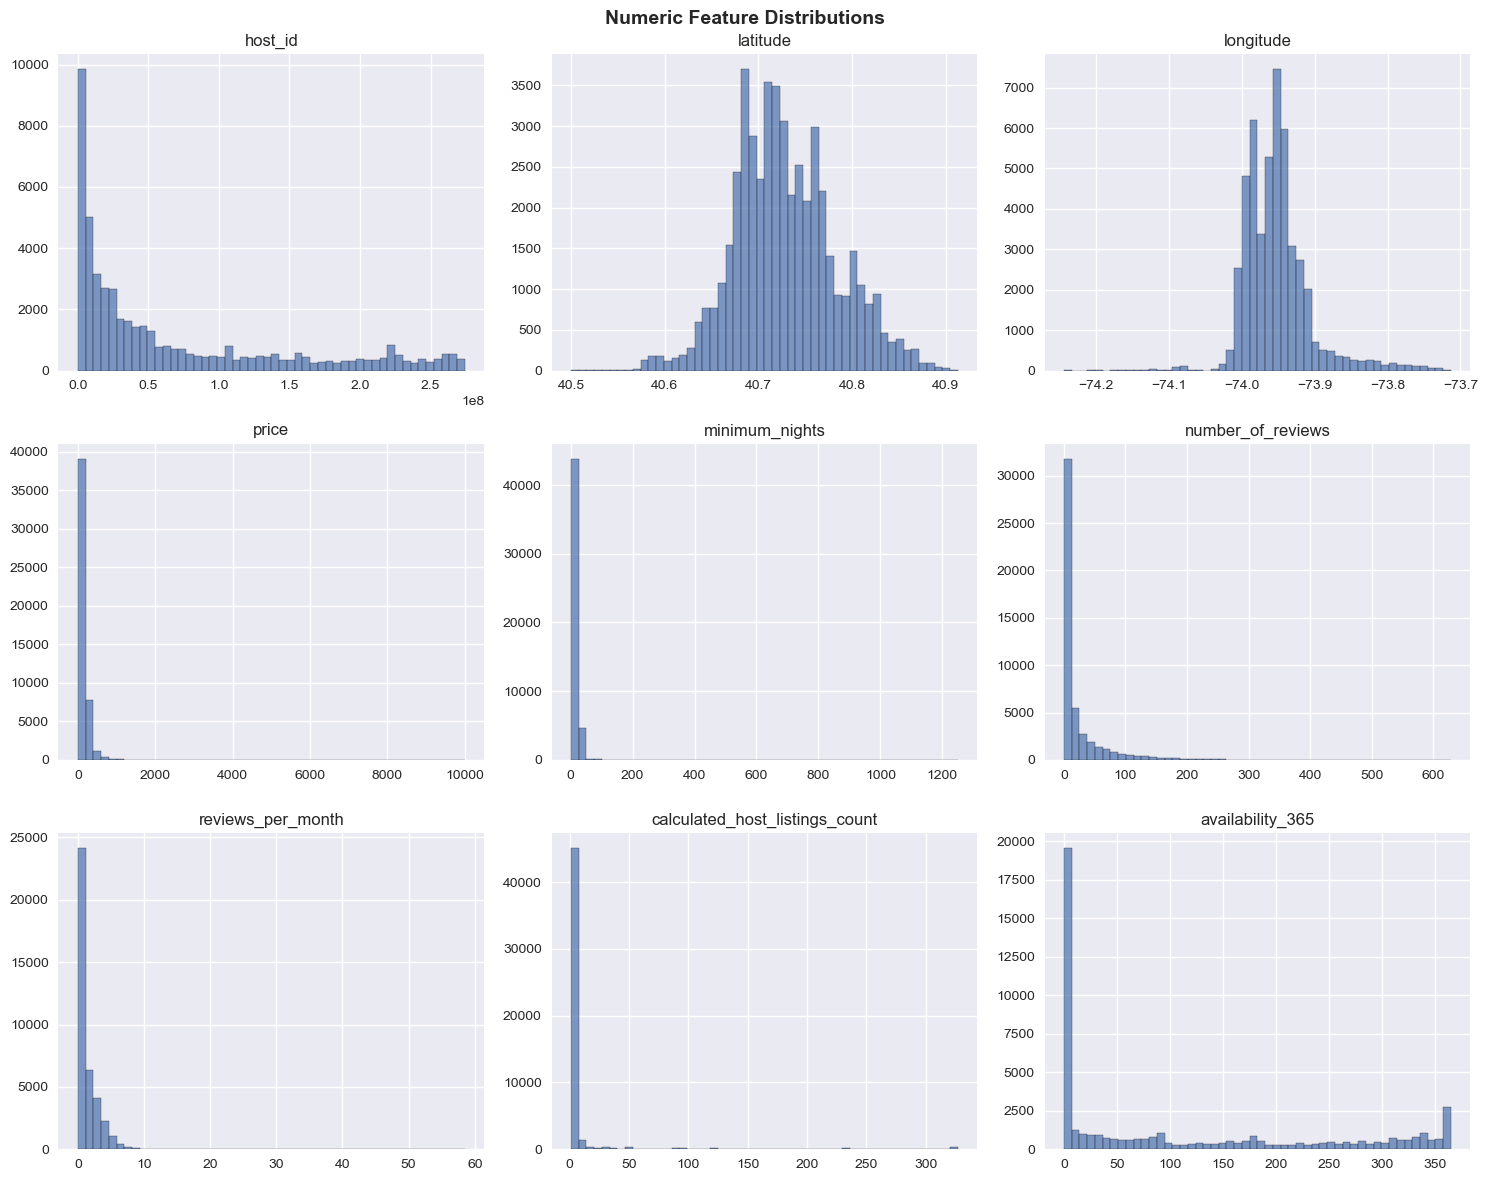

In [23]:
fig,axes = plt.subplots(3,3,figsize=(15,12))
axes = axes.flatten()

for i,col in enumerate(numeric_features):
    axes[i].hist(df[col], bins=50, edgecolor='black', alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_xlabel('')

plt.suptitle('Numeric Feature Distributions', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Feature Distribution Observations

This dataset contains both numeric and categorical data. Because the categorical data needs to be preprocessed in order to visualize, numeric variables were considered only. The categorical data will be preprocessed in the next stage. 

Looking at the numeric variable distributions, they are mostly all heavily skewed right, just like the target variable. This indicates that there are many outliers within the dataset, and these variables will need to be more normalized in order to prepare it to be used in regression analysis. We explore these distributions further and address outliers in the preprocessing stage. 



## 5. Correlation Analysis

### Correlation Observations

*TODO: Write your observations here*

1. **Strongest predictor:** ...
2. **Other important features:** ...
3. **Multicollinearity concerns:** ...


## 6. Key Findings Summary

## EDA Checklist

Before moving to modeling, ensure you've completed:

- [ ] Loaded and examined the data
- [ ] Checked data types
- [ ] Identified and documented missing values
- [ ] Analyzed target variable distribution
- [ ] Examined feature distributions
- [ ] Created correlation analysis
- [ ] Documented key findings
- [ ] Identified potential data quality issues